# Pile up again


In [1]:
#Set up
import os, sys
sys.path.append(os.getcwd() + "/../")
from prep_ana_II import *
sys.path.append(os.getcwd() + "/../tools/")
from lepton_eff import muonEff, electronEff
from pile_up import pileUpFunction, Min_Bias

import matplotlib
matplotlib.rcParams.update({'font.size': 22})
import warnings
warnings.filterwarnings('ignore')

Welcome to JupyROOT 6.10/00
Loading binning options...
Loading plotting options
unc_mc_process and scales are parameter dictionaries


In [2]:
%matplotlib inline

In [3]:
df = load_origMC()
df_da = load_origDATA()

Warning in <TStreamerInfo::BuildCheck>: 
   The StreamerInfo of class string read from file /home/gunter/WW_analysis/data_alpha/dyjetstoll_m-50_complete.root
   has the same version (=2) as the active class but a different checksum.
   You should update the version to ClassDef(string,3).
   Do not try to write objects with the current class definition,
   the files will not be readable.

Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'string' is missing from 
the on-file layout version 2:
   string::_Alloc_hider _M_dataplus; //
Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'string' is missing from 
the on-file layout version 2:
   unsigned long _M_string_length; //
Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'string' is missing from 
the on-file layout version 2:
   string::(anonymous) ;

In [3]:
df = load_preselMC()
df_da = load_preselDATA()
df_ww = rp.read_root(data_path+"/ww_complete.root", columns=columns)

Warning in <TStreamerInfo::BuildCheck>: 
   The StreamerInfo of class string read from file /home/gunter/WW_analysis/data_old_alpha/ww_complete.root
   has the same version (=2) as the active class but a different checksum.
   You should update the version to ClassDef(string,3).
   Do not try to write objects with the current class definition,
   the files will not be readable.

Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'string' is missing from 
the on-file layout version 2:
   string::_Alloc_hider _M_dataplus; //
Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'string' is missing from 
the on-file layout version 2:
   unsigned long _M_string_length; //
Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'string' is missing from 
the on-file layout version 2:
   string::(anonymous) ; //


(<matplotlib.figure.Figure at 0x7f19529972d0>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1951aec550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f194e70e590>], dtype=object))

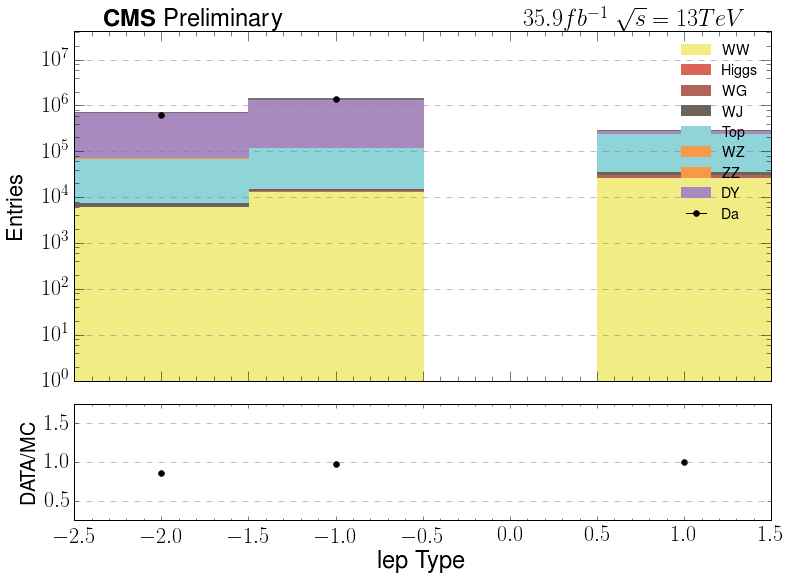

In [8]:
#Original
df_bin = bin_df(df[(df.mll > 30) & (df.lep2_pt > 25)], binned_feature='lep_Type', scales=scales_)
df_da_bin = bin_df(df_da[(df_da.mll > 30) & (df_da.lep2_pt > 25)], binned_feature='lep_Type')

full_plot(df_bin, df_da_bin, color="color_1")

## calc new weights

In [4]:
def calc_new_weights(df, min_bias = Min_Bias.MID, metflag=1):
    l = list(df.gen_pu.values)
    gw = np.ones(df.shape[0])
    gw *= df.gen_weight.values
    w = np.array(pileUpFunction(l, min_bias, metflag))
    
    return gw * w

### MetFlag on

metFilter on
File name:/home/gunter/WW_analysis/production/Analysis_13TeV/tools/pileup_sf_2016_full_66013_bins75_metFilter.root
metFilter on
File name:/home/gunter/WW_analysis/production/Analysis_13TeV/tools/pileup_sf_2016_full_69216_bins75_metFilter.root
metFilter on
File name:/home/gunter/WW_analysis/production/Analysis_13TeV/tools/pileup_sf_2016_full_72386_bins75_metFilter.root


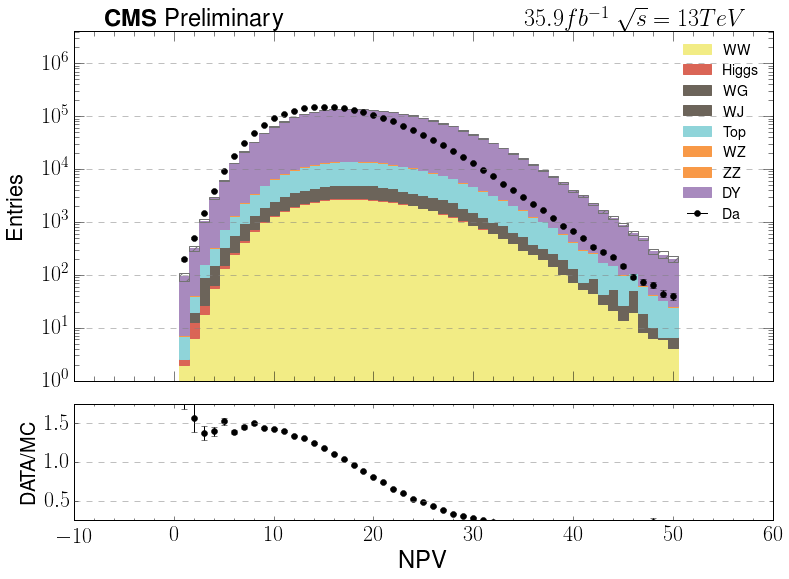

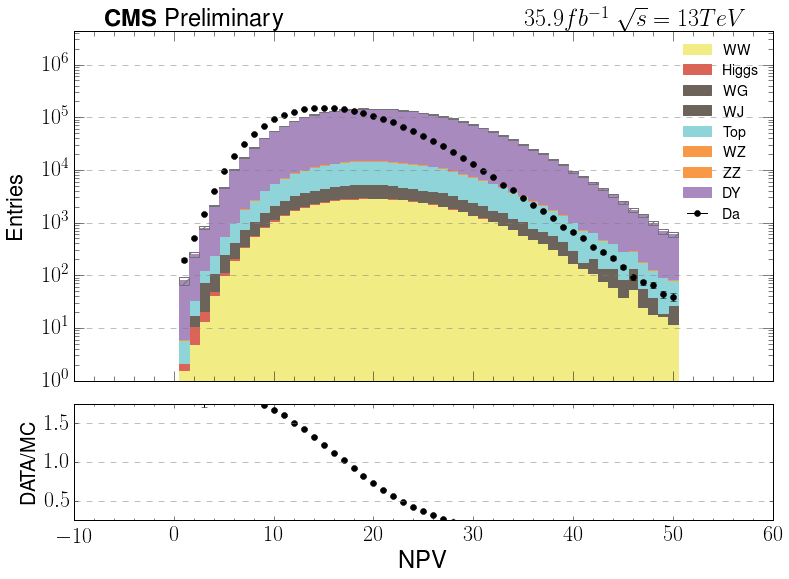

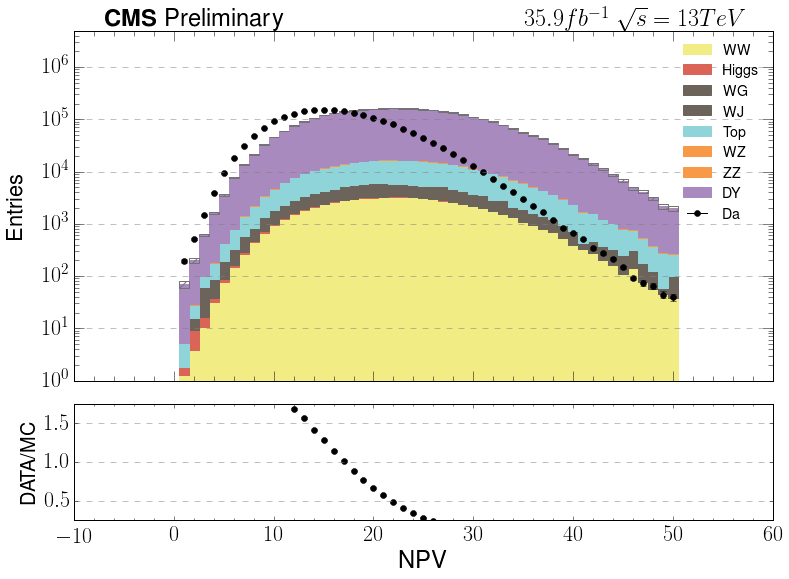

In [5]:
minbias_list = [Min_Bias.LOW, Min_Bias.MID, Min_Bias.HIGH]
for mb in minbias_list:
    df_bin = bin_df(df, binned_feature='tot_npv', weights_arr_= calc_new_weights(df, min_bias=mb))
    df_da_bin = bin_df(df_da, binned_feature='tot_npv')

    full_plot(df_bin, df_da_bin, color="color_1")

(<matplotlib.figure.Figure at 0x7f4e273884d0>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e20d07bd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4e6d1bd410>], dtype=object))

metFilter on
File name:/home/gunter/WW_analysis/production/Analysis_13TeV/tools/pileup_sf_2016_full_69216_bins75_metFilter.root


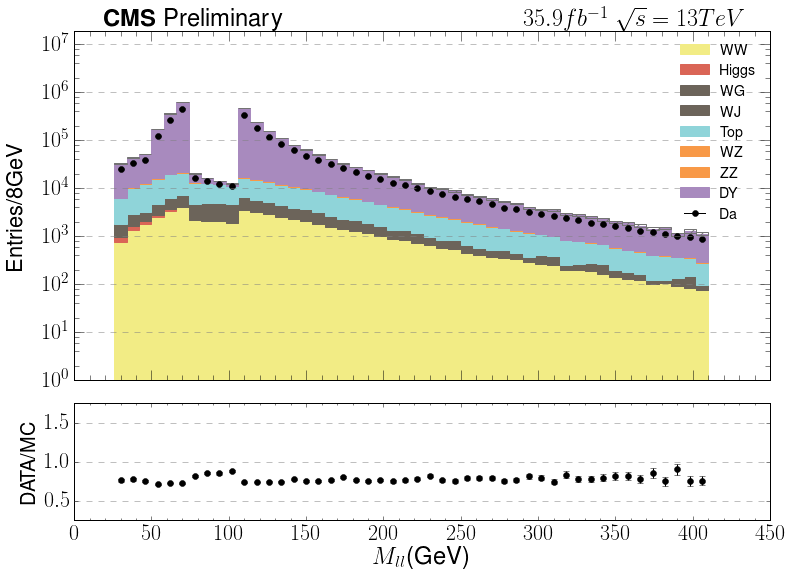

In [6]:
df_bin = bin_df(df, binned_feature='mll', weights_arr_= calc_new_weights(df, min_bias=Min_Bias.MID))
df_da_bin = bin_df(df_da, binned_feature='mll')

full_plot(df_bin, df_da_bin, color="color_1")

### MetFlag off

metFilter off
File name:/home/gunter/WW_analysis/production/Analysis_13TeV/tools/pileup_sf_2016_full_66013_bins75_in.root
metFilter off
File name:/home/gunter/WW_analysis/production/Analysis_13TeV/tools/pileup_sf_2016_full_69216_bins75_in.root
metFilter off
File name:/home/gunter/WW_analysis/production/Analysis_13TeV/tools/pileup_sf_2016_full_72386_bins75_in.root


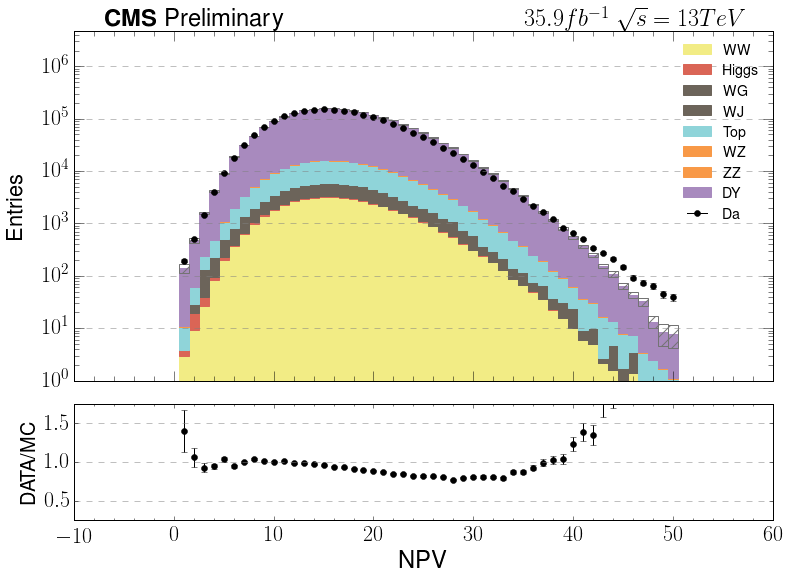

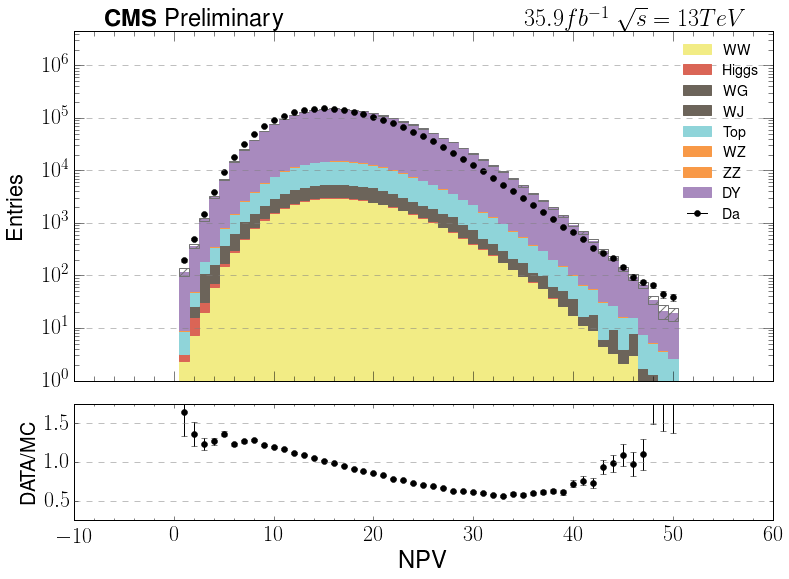

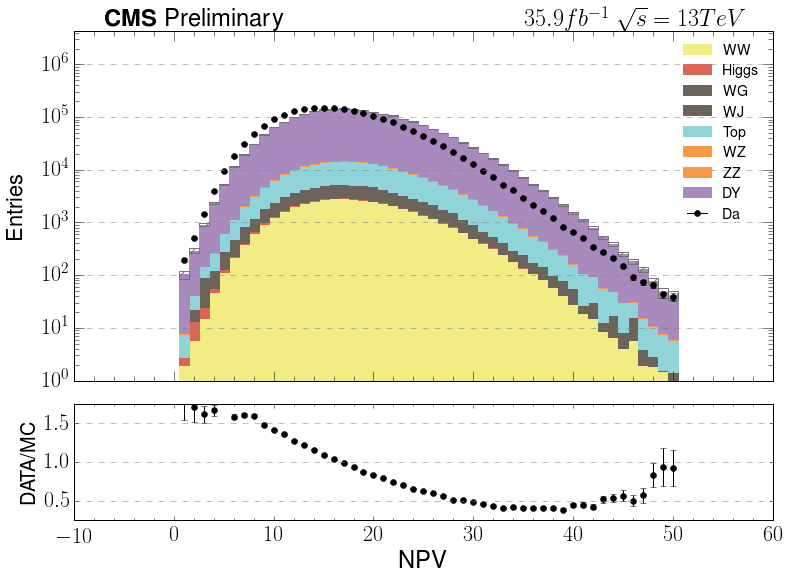

In [7]:
minbias_list = [Min_Bias.LOW, Min_Bias.MID, Min_Bias.HIGH]
for mb in minbias_list:
    df_bin = bin_df(df, binned_feature='tot_npv', weights_arr_= calc_new_weights(df, min_bias=mb, metflag=2))
    df_da_bin = bin_df(df_da, binned_feature='tot_npv')

    full_plot(df_bin, df_da_bin, color="color_1")

(<matplotlib.figure.Figure at 0x7f4e6cec0210>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e20350410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4e1efd4490>], dtype=object))

metFilter off
File name:/home/gunter/WW_analysis/production/Analysis_13TeV/tools/pileup_sf_2016_full_69216_bins75_in.root


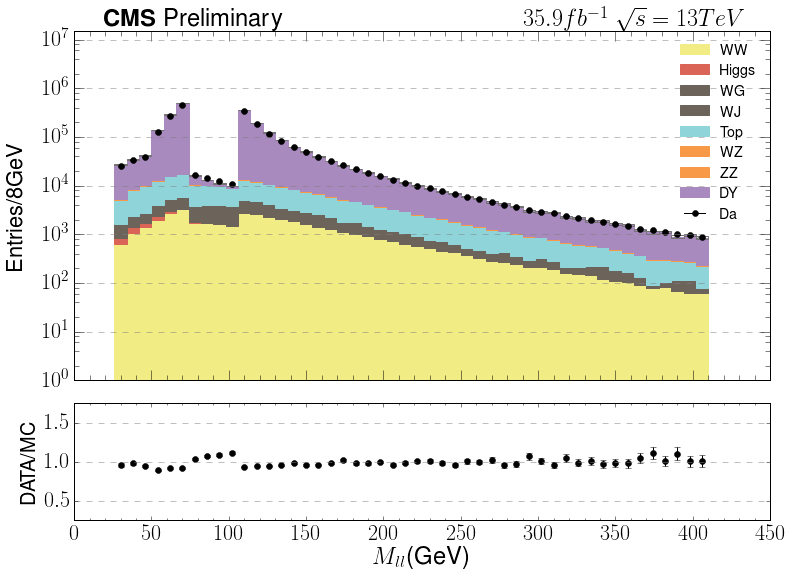

In [8]:
df_bin = bin_df(df, binned_feature='mll', weights_arr_= calc_new_weights(df, min_bias=Min_Bias.MID, metflag=2))
df_da_bin = bin_df(df_da, binned_feature='mll')

full_plot(df_bin, df_da_bin, color="color_1")

## MetFiler Conclusion

While working on this we discovered a problem with pileup weights and the metFilter. It was found that the metFilter changes the pileup distribution. In changing this the end scales did two things. The first is that scales derived from one and applied on the other the scales changed the over all number of events. The second is that the shape of the number of primary vertices distrubition did not follow from data and monte carlo.

# Other stuff
- look at the number of WW when changing pileup.
- How does the ratio of efficiency change
- look at how the sum total of background changes

In [10]:
for process in df.process.unique():
    l = [calc_new_weights(df[df.process == process], min_bias = mb).sum() for mb in [Min_Bias.LOW, Min_Bias.MID, Min_Bias.HIGH]]
    print "preselection " + process, l, np.array(l) / l[1]


preselection DY [551018.48570139077, 523828.70083188452, 493228.27220187994] [ 1.05190587  1.          0.94158314]
preselection Higgs [4184.8064900562167, 3791.3496480211616, 3395.5945765152574] [ 1.10377751  1.          0.89561631]
preselection WW [152513.82972028432, 144886.08158894675, 136321.68460858869] [ 1.05264652  1.          0.94088875]
preselection Top [2067672.6743009258, 1961615.920319238, 1842657.8337451841] [ 1.05406601  1.          0.9393571 ]
preselection ZZ [159012.23641864269, 151022.63985982409, 142043.95246326947] [ 1.0529033   1.          0.94054741]
preselection WZ [145024.34464176267, 137617.64776514657, 129311.63848199975] [ 1.05382084  1.          0.9396443 ]
preselection WJ [6641.2283508554101, 6289.8476406857371, 5898.0379332751036] [ 1.05586474  1.          0.9377076 ]
preselection WG [562.74968540668488, 512.86566057801247, 461.08607906103134] [ 1.09726529  1.          0.8990387 ]


In [12]:
for process in df.process.unique():
    l = [calc_new_weights(df[(df.process == process) & (df.pred_fDY_WW > .9) & (df.pred_fTT_WW > .6)], min_bias = mb).sum() for mb in [Min_Bias.LOW, Min_Bias.MID, Min_Bias.HIGH]]
    print "preselection " + process, l, np.array(l) / l[1]


preselection DY [659.3690182492137, 634.58673764765263, 604.85681989789009] [ 1.03905263  1.          0.95315074]
preselection Higgs [999.5223333761096, 905.28080704063177, 811.01231787353754] [ 1.10410198  1.          0.89586823]
preselection WW [56857.262120306841, 53834.958803633694, 50469.818791619269] [ 1.05614016  1.          0.93749155]
preselection Top [67174.223614777555, 63554.86044035852, 59527.524541986641] [ 1.05694864  1.          0.93663213]
preselection ZZ [14868.160311832093, 14065.643444558606, 13173.299901716411] [ 1.05705511  1.          0.93655864]
preselection WZ [7888.7045294381678, 7449.8985216058791, 6965.3240713402629] [ 1.05890094  1.          0.93495556]
preselection WJ [673.02856392413378, 639.07644575834274, 600.71810564398766] [ 1.05312685  1.          0.93997848]
preselection WG [216.76978868246078, 194.76804602146149, 172.63871908187866] [ 1.11296382  1.          0.88638112]


In [15]:
df_ww = rp.read_root(data_path+"/ww_complete.root", columns=columns)
a = np.array([calc_new_weights(df_ww, min_bias= mb ).sum() for mb in [Min_Bias.LOW, Min_Bias.MID, Min_Bias.HIGH]])
print a , a/a[1]

[ 235520.32909582  223351.31792947  209773.23993804] [ 1.05448372  1.          0.93920753]


# END

In [20]:
scales['DYJetsToLL_M-50'] *= 4 * .75


In [28]:
t = df_bin['DYJetsToLL_M-50'][0] / df_da_bin['Da'][0] / 20000.
t

array([        nan,  0.27571705,  0.45721976,  0.48543236,  0.48992352,
        0.47605773,  0.49469388,  0.51019515,  0.53092873,  0.5562087 ,
        0.58247856,  0.61781619,  0.65363508,  0.68872779,  0.73431094,
        0.77435023,  0.81937546,  0.86660879,  0.92120924,  0.96851646,
        1.0091259 ,  1.04835783,  1.08973694,  1.13754525,  1.1850811 ,
        1.22241868,  1.26238447,  1.29945317,  1.3397902 ,  1.38172082,
        1.42030867,  1.4668114 ,  1.46087644,  1.55029358,  1.52244937,
        1.51253443,  1.56945243,  1.5523908 ,  1.50362245,  1.51128875,
        1.38070051,  1.33130056,  1.30386626,  1.13507707,  1.10484388,
        0.99402623,  1.34613463,  1.27201997,  0.80030129,  0.74138979,
        0.80793803])

(<matplotlib.figure.Figure at 0x7fd1a9a324d0>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1a8e356d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd19ec53090>], dtype=object))

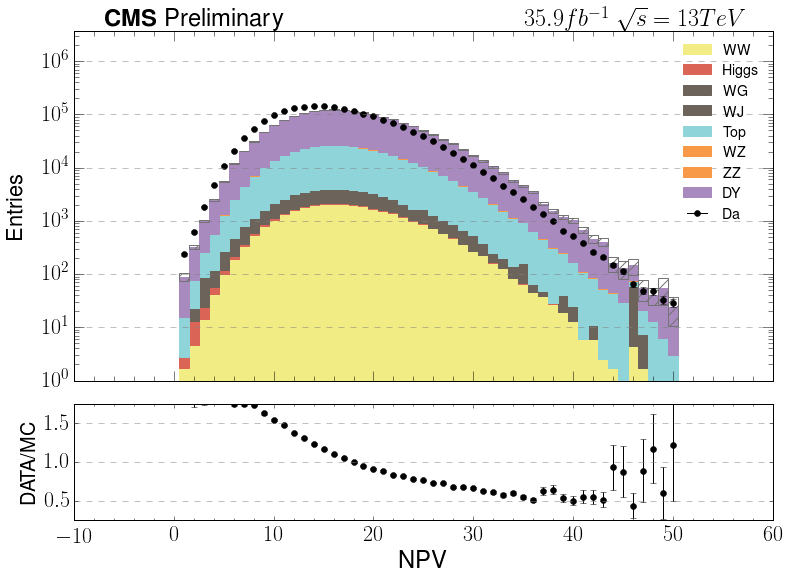

In [9]:
df_bin = bin_df(df, binned_feature='tot_npv', weights_arr_= calc_new_weights(df, min_bias=Min_Bias.MID))
df_da_bin = bin_df(df_da, binned_feature='tot_npv')

full_plot(df_bin, df_da_bin, color="color_1")